<a href="https://colab.research.google.com/github/Shresti007/ANN_Bank_Churning_Happymonk/blob/main/02%20Yolov5%20Object%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Custom Training with YOLOv5

####  Step 1: Install Requirements

In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 11748, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 11748 (delta 47), reused 88 (delta 34), pack-reused 11632
Receiving objects: 100% (11748/11748), 12.47 MiB | 13.93 MiB/s, done.
Resolving deltas: 100% (8040/8040), done.
/content/yolov5
     |████████████████████████████████| 596 kB 25.2 MB/s 
     |████████████████████████████████| 1.6 MB 49.1 MB/s 
     |████████████████████████████████| 145 kB 10.3 MB/s 
     |████████████████████████████████| 178 kB 57.4 MB/s 
     |████████████████████████████████| 1.1 MB 51.4 MB/s 
     |████████████████████████████████| 67 kB 7.3 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 138 kB 63.4 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [5]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [2]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [8]:
#after following the link above, recieve python code with these fields filled in
from roboflow import Roboflow
rf = Roboflow(api_key="xWbYKupFwxqR1BEwGcd4")
project = rf.workspace("happy-monk").project("vehicleperson-object-detection")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/VehiclePerson-Object-detection-2 in yolov5pytorch:: 100%|██████████| 136/136 [00:00<00:00, 1185.88it/s]


## Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:

img: define input image size

batch: determine batch size

epochs: define the number of training epochs. (Note: often, 3000+ are common here!)

data: Our dataset locaiton is saved in the dataset.location

weights: specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.

cache: cache images for faster training

In [10]:
!python train.py --img 53 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/VehiclePerson-Object-detection-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=53, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-10-g5c854fa Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl

## Evaluate Custom YOLOv5 Detector Performance


Training losses and performance metrics are saved to Tensorboard and also to a logfile.

If you are new to these metrics, the one you want to focus on is mAP_0.5 - learn more about mean average precision 

## Run Inference With Trained Weights

Run inference with a pretrained checkpoint on contents of test/images folder downloaded from Roboflow.

In [12]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 62 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/VehiclePerson-Object-detection-2/test/images, data=data/coco128.yaml, imgsz=[62, 62], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-10-g5c854fa Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/4 /content/datasets/VehiclePerson-Object-detection-2/test/images/810205132_jpg.rf.2fd82fca909de054d307d1858dbc0c3d.jpg: 64x64 Done. (0.011s)
image 2/4 /content/datasets/VehiclePerson-Object-detection-2/test/images/943917099_jpg.rf.4784420769b0eeb904241f26f7e18dc9.jpg: 64x64 Done. (0.008s)
image 3/4 /content/data

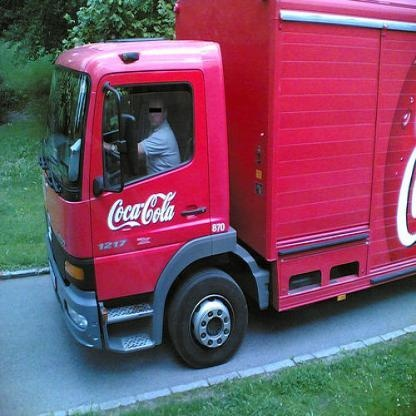

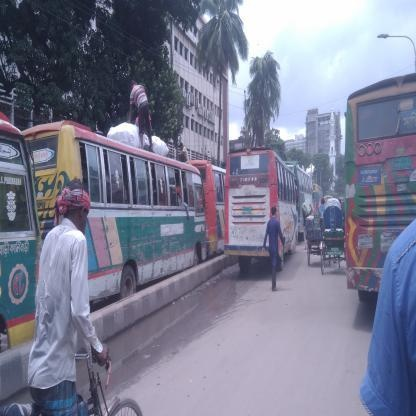

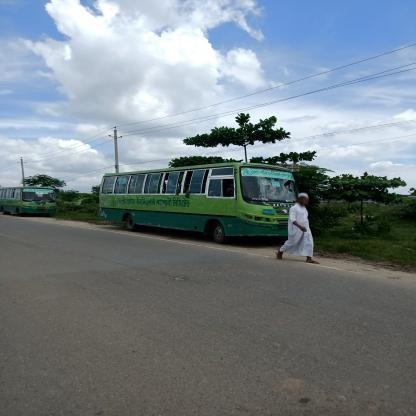

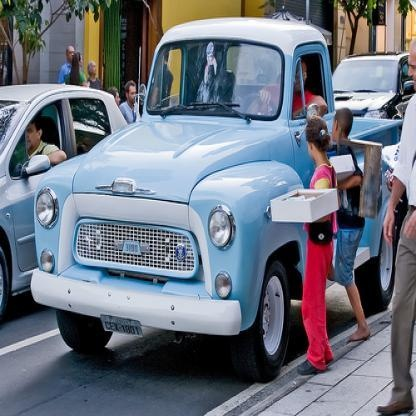

In [13]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")